In [34]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import random
from utils.file_helpers import get_root_path

In [2]:
root_path = get_root_path()
lst_file = os.path.join(root_path, "data", "raw", "label", "label.lst")
header = ['file', 'face_id', 'top', 'left', 'right', 'bottom', 'cofidence', 'label']

data_frame = pd.read_csv(lst_file, delimiter=' ', header=None, names=header)
print(data_frame.head())
print(data_frame.count())

                  file  face_id  top  left  right  bottom  cofidence  label
0  angry_actor_104.jpg        0   28   113    226     141    22.9362      0
1  angry_actor_109.jpg        0   31   157    345     219    50.3056      0
2  angry_actor_120.jpg        1   53    53    372     372    13.9434      2
3   angry_actor_13.jpg        0   77    51    362     388    85.8104      3
4  angry_actor_132.jpg        0   95    31    412     476    82.3948      0
file         91793
face_id      91793
top          91793
left         91793
right        91793
bottom       91793
cofidence    91793
label        91793
dtype: int64


In [3]:
face_box_top = data_frame["top"]
face_box_left = data_frame["left"]
face_box_right = data_frame["right"]
face_box_bottom = data_frame["bottom"]
face_box_height = face_box_bottom - face_box_top
face_box_weight = face_box_right - face_box_left

In [4]:
# check image shape is not square
for i in range(len(data_frame)):
    if face_box_height[i] != face_box_weight[i]:
        print(i)
        
print("ok")

ok


In [18]:
face_box_height.unique()

array([ 113,  188,  319,  311,  381,  374, 1127,   80,   95,  226,  272,
        383,   96,  135,  537,  317,  193,  136,  191,  228,  138,  160,
        163,   67,  386,  223,  267,  395,  133,  111,  186,  923,  326,
        196,  229,  235,  633,  315,  371,  231,  115,   47,  187,  162,
        137,   81,  265,  230,  159,  189,  314,  325,  366,  222, 1870,
        232,  165,  134,   48,   57,  557,  161,   56,  192,  463,  269,
        271,   68,  387,  194,  112,  225,  273,  275,  276,  227,  100,
         94,  266,  114,  158,  382,  644,  277,   93,  476,  370,   46,
         58,  318,  190,  534,  457,  195,   79,  642,  130,  322,  233,
        553,  281,  274,  755,  541,  324,  911,  749,  389,  905,  313,
        380,  666,  450,  264,  116,  221,  375,  331,  320, 1085,  640,
        459,  551,  270,  323,  321,  224,  330, 1110,  639,  631,  157,
        316,  538,  384,  379,  280,  461,  625,  185,  378,  399,  164,
        132,  442,  535,  456,  658,  545,   97,  4

In [5]:
print(face_box_height.max())
print(face_box_height.min())

2117
46


In [6]:
data_frame["cofidence"].max()

142.413

In [7]:
data_frame["cofidence"].min()

0.0101537

file         distressed_son_564.jpg
face_id                           0
top                             127
left                            295
right                           375
bottom                          207
cofidence                   142.413
label                             3
Name: 41506, dtype: object
(961, 700, 3)


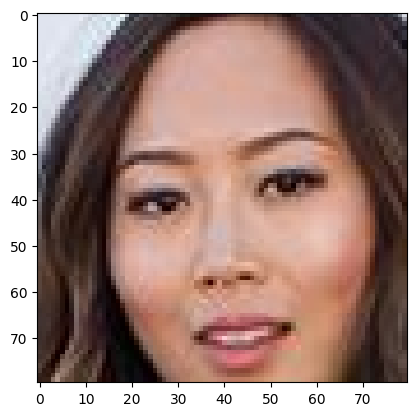

In [20]:
max_confidence = data_frame.iloc[data_frame["cofidence"].idxmax()]
print(max_confidence)
img = cv2.imread('./data/processed/image/origin/{}'.format(max_confidence["file"]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
face_box = img[int(127):int(207), int(295): int(375), :]
# image = image[int(top):int(bottom), int(left): int(right), :]
print(img.shape)
# plt.imshow(img)
plt.imshow(face_box)

file         amazed_African_633.jpg
face_id                           0
top                              15
left                            254
right                           349
bottom                          110
cofidence                  0.010154
label                             5
Name: 82285, dtype: object
(447, 676, 3)


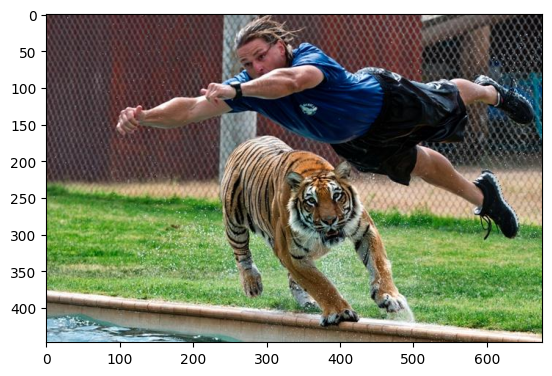

In [22]:
min_confidence = data_frame.iloc[data_frame["cofidence"].idxmin()]
print(min_confidence)
img = cv2.imread('./data/processed/image/origin/{}'.format(min_confidence["file"]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
face_box = img[int(127):int(207), int(295): int(375), :]
# image = image[int(top):int(bottom), int(left): int(right), :]
print(img.shape)
plt.imshow(img)

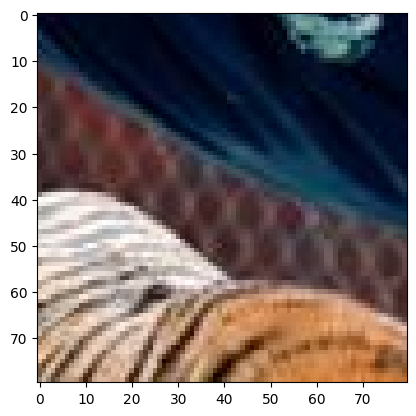

In [23]:
plt.imshow(face_box)

In [26]:
print(data_frame["cofidence"].unique())
len(data_frame["cofidence"].unique())

[22.9362 50.3056 13.9434 ... 96.2861 39.9223 77.7758]


84366

In [32]:
# Danh sách các khoảng kích thước bạn quan tâm
# image_sizes = ["0 - 150", "150 - 300", "300 - 450", "450 - 600", "600 - 750", "750 - 900", "900 - "]
image_confidence = {
    " - 20": 0,
    "20 - 40": 0,
    "40 - 60": 0,
    "60 - 80": 0,
    "80 - 100": 0,
    "100 - 120": 0,
    "120 - 140": 0,
    "140 - ": 0,
}

for item in data_frame["cofidence"]:
    if item >= 140:
        image_confidence["140 - "] = image_confidence["140 - "] + 1
    elif item >= 120:
        image_confidence["120 - 140"] = image_confidence["120 - 140"] + 1
    elif item >= 100:
        image_confidence["100 - 120"] = image_confidence["100 - 120"] + 1
    elif item >= 80:
        image_confidence["80 - 100"] = image_confidence["80 - 100"] + 1
    elif item >= 60:
        image_confidence["60 - 80"] = image_confidence["60 - 80"] + 1
    elif item >= 40:
        image_confidence["40 - 60"] = image_confidence["40 - 60"] + 1
    elif item >= 20:
        image_confidence["20 - 40"] = image_confidence["20 - 40"] + 1
    else:
        image_confidence[" - 20"] = image_confidence[" - 20"] + 1

print(image_confidence["140 - "])
print(image_confidence["120 - 140"])
print(image_confidence["80 - 100"])
print(image_confidence["60 - 80"])
print(image_confidence["40 - 60"])
print(image_confidence["20 - 40"])
print(image_confidence[" - 20"])

1
78
10120
21248
24558
21308
12552


In [51]:
confidence_10 = 0
index_confidence_10 = []
for i, item in enumerate(data_frame["cofidence"]):
    if item < 10:
        confidence_10 = confidence_10  + 1
        index_confidence_10.append(i)

print(confidence_10)
print(len(index_confidence_10))
print(index_confidence_10)

4488
4488
[8, 138, 161, 162, 176, 184, 201, 207, 274, 329, 371, 376, 414, 525, 619, 639, 698, 730, 796, 800, 879, 937, 938, 968, 1096, 1116, 1216, 1238, 1250, 1260, 1337, 1346, 1392, 1393, 1451, 1518, 1524, 1574, 1632, 1637, 1651, 1685, 1757, 1787, 1790, 1806, 1813, 1831, 1880, 1881, 1882, 1963, 2100, 2146, 2166, 2173, 2196, 2203, 2215, 2319, 2355, 2391, 2434, 2464, 2508, 2520, 2531, 2533, 2585, 2730, 2794, 2850, 2919, 2926, 2945, 2955, 2956, 2958, 2995, 3215, 3318, 3330, 3340, 3366, 3396, 3408, 3485, 3543, 3564, 3569, 3578, 3581, 3590, 3594, 3611, 3613, 3660, 3679, 3685, 3697, 3730, 3742, 3768, 3786, 3797, 3861, 3877, 3897, 3973, 3978, 3988, 4007, 4023, 4029, 4074, 4106, 4107, 4108, 4111, 4117, 4132, 4148, 4173, 4203, 4210, 4247, 4343, 4365, 4377, 4449, 4458, 4477, 4564, 4567, 4569, 4578, 4610, 4667, 4704, 4705, 4731, 4781, 4815, 4845, 4857, 4868, 4871, 4872, 4876, 4910, 4930, 4938, 4948, 4969, 4975, 4979, 5026, 5030, 5044, 5085, 5123, 5129, 5150, 5159, 5168, 5170, 5226, 5237, 5261, 5

In [60]:
data_frame.loc[0]

file         angry_actor_104.jpg
face_id                        0
top                           28
left                         113
right                        226
bottom                       141
cofidence                22.9362
label                          0
Name: 0, dtype: object

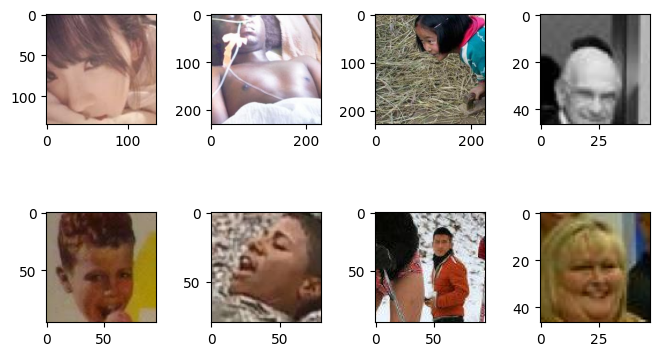

In [76]:
def plot_data(data_frame, index_confidence_10: np.ndarray) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

  # Đặt khoảng cách giữa các subplots
  fig.subplots_adjust(hspace=0.8, wspace=0.3)

  len_x = len(index_confidence_10)
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]

    img_idx = random.randint(0, len_x)
    # print(img_idx)

    # ax.imshow(x_data[img_idx][0])
    # print(data_frame.loc[index_confidence_10[img_idx]])
    item = data_frame.loc[index_confidence_10[img_idx]]
    img = cv2.imread('./data/processed/image/origin/{}'.format(data_frame.loc[index_confidence_10[img_idx]]["file"]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = img[int(item["top"]):int(item['bottom']), int(item['left']): int(item['right']), :]
    ax.imshow(image)
    # print('./data/processed/image/origin/{}'.format(data_frame.loc[index_confidence_10[img_idx]]["file"]))

    # ax.set_xlabel(x_data[img_idx][0].shape[1])
    # ax.set_ylabel(x_data[img_idx][0].shape[0])

# plot_data(data_frame["file"])
plot_data(data_frame, index_confidence_10)

# img = cv2.imread('./data/processed/image/origin/{}'.format(max_confidence["file"]))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# face_box = img[int(127):int(207), int(295): int(375), :]
# image = image[int(top):int(bottom), int(left): int(right), :]

In [79]:
confidence_120 = 0
index_confidence_120 = []
for i, item in enumerate(data_frame["cofidence"]):
    if item > 120:
        confidence_120 = confidence_120  + 1
        index_confidence_120.append(i)

print(confidence_120)
print(len(index_confidence_120))
print(index_confidence_120)

79
79
[423, 548, 3204, 8142, 11117, 12164, 20953, 24143, 25858, 26250, 27128, 27426, 29519, 30922, 32217, 32721, 36570, 38688, 39107, 40628, 41255, 41506, 41811, 46255, 50009, 51041, 52209, 52306, 52563, 53091, 54800, 56025, 56134, 56276, 58284, 58382, 59692, 60403, 60734, 60989, 61657, 62827, 63100, 63767, 63947, 64808, 65025, 65080, 65110, 66093, 66364, 68428, 68771, 68977, 69089, 69657, 69757, 70226, 70299, 70348, 70566, 70758, 71017, 71501, 72705, 72852, 74095, 74624, 78821, 78965, 79292, 81763, 87029, 89954, 90051, 90102, 90509, 91522, 91529]


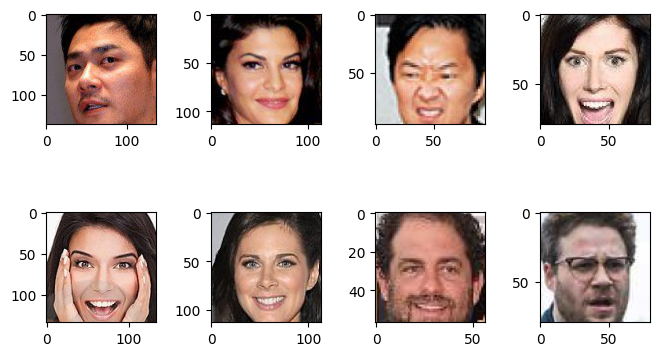

In [93]:
def plot_data(data_frame, index_confidence_10: np.ndarray) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

  # Đặt khoảng cách giữa các subplots
  fig.subplots_adjust(hspace=0.8, wspace=0.3)

  len_x = len(index_confidence_10)
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]

    img_idx = random.randint(0, len_x)
    # print(img_idx)

    # ax.imshow(x_data[img_idx][0])
    # print(data_frame.loc[index_confidence_10[img_idx]])
    item = data_frame.loc[index_confidence_10[img_idx]]
    img = cv2.imread('./data/processed/image/origin/{}'.format(data_frame.loc[index_confidence_10[img_idx]]["file"]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = img[int(item["top"]):int(item['bottom']), int(item['left']): int(item['right']), :]
    ax.imshow(image)
    # print('./data/processed/image/origin/{}'.format(data_frame.loc[index_confidence_10[img_idx]]["file"]))

    # ax.set_xlabel(x_data[img_idx][0].shape[1])
    # ax.set_ylabel(x_data[img_idx][0].shape[0])

# plot_data(data_frame["file"])
plot_data(data_frame, index_confidence_120)

# img = cv2.imread('./data/processed/image/origin/{}'.format(max_confidence["file"]))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# face_box = img[int(127):int(207), int(295): int(375), :]
# image = image[int(top):int(bottom), int(left): int(right), :]

In [27]:
# Danh sách các khoảng kích thước bạn quan tâm
# image_sizes = ["0 - 150", "150 - 300", "300 - 450", "450 - 600", "600 - 750", "750 - 900", "900 - "]
image_sizes = {
    " - 150": 0,
    "150 - 300": 0,
    "300 - 450": 0,
    "450 - 600": 0,
    "600 - 750": 0,
    "750 - 900": 0,
    "900 - ": 0,
}

for item in face_box_height:
    if item >= 900:
        image_sizes["900 - "] = image_sizes["900 - "] + 1
    elif item >= 750:
        image_sizes["750 - 900"] = image_sizes["750 - 900"] + 1
    elif item >= 600:
        image_sizes["600 - 750"] = image_sizes["600 - 750"] + 1
    elif item >= 450:
        image_sizes["450 - 600"] = image_sizes["450 - 600"] + 1
    elif item >= 300:
        image_sizes["300 - 450"] = image_sizes["300 - 450"] + 1
    elif item >= 150:
        image_sizes["150 - 300"] = image_sizes["150 - 300"] + 1
    else:
        image_sizes[" - 150"] = image_sizes[" - 150"] + 1

print(image_sizes["900 - "])
print(image_sizes["750 - 900"])
print(image_sizes["600 - 750"])
print(image_sizes["450 - 600"])
print(image_sizes["300 - 450"])
print(image_sizes["150 - 300"])
print(image_sizes[" - 150"])

363
315
591
1876
4470
19053
65125


In [94]:
# list(image_sizes.keys())
image_sizes.keys()
image_sizes.values()

dict_values([0, 25339, 8589, 16117, 8326, 6742, 26680])

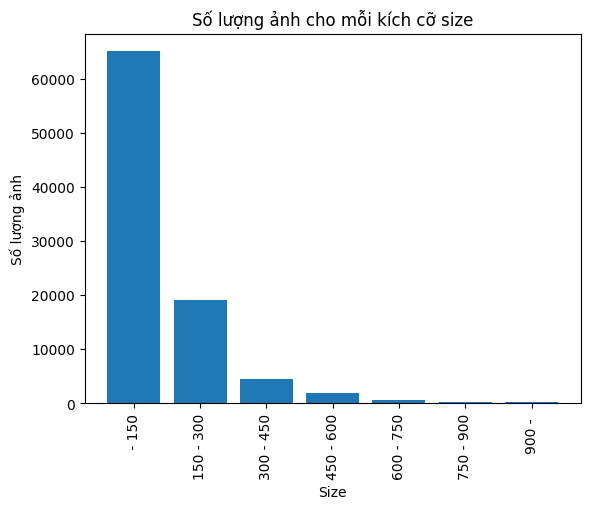

In [41]:
# Vẽ biểu đồ cột
plt.bar(image_sizes.keys(), image_sizes.values())

# Đặt tiêu đề và nhãn trục
plt.title('Số lượng ảnh cho mỗi kích cỡ size')
plt.xlabel('Size')
plt.ylabel('Số lượng ảnh')

# Đảm bảo nhãn trục x hiển thị dễ đọc
plt.xticks(rotation='vertical')

# Hiển thị biểu đồ
plt.show()

In [79]:
# max_row = df.loc[df['Age'].idxmax()]
max_row = data_frame.loc[face_box_height.idxmax()]
print(max_row)

file         fighting_manager_888.jpg
face_id                             0
top                                 0
left                              882
right                            2999
bottom                           2117
cofidence                     11.3905
label                               6
Name: 24095, dtype: object


(3000, 3000, 3)


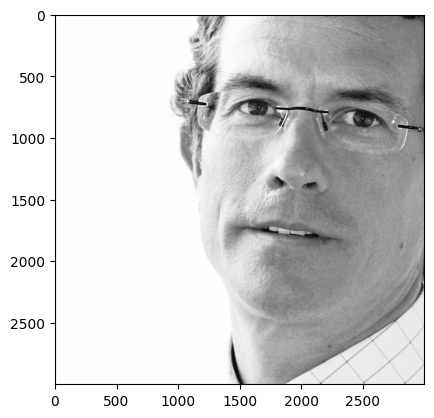

In [11]:
img = cv2.imread('./data/processed/image/origin/fighting_manager_888.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

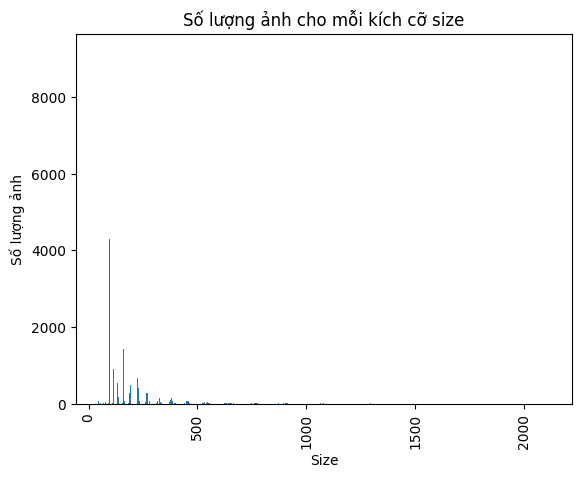

In [73]:
# Đếm số lượng ảnh cho mỗi kích cỡ size
size_counts = face_box_height.value_counts()

# Vẽ biểu đồ cột
plt.bar(size_counts.index, size_counts.values)

# Đặt tiêu đề và nhãn trục
plt.title('Số lượng ảnh cho mỗi kích cỡ size')
plt.xlabel('Size')
plt.ylabel('Số lượng ảnh')

# Đảm bảo nhãn trục x hiển thị dễ đọc
plt.xticks(rotation='vertical')

# Hiển thị biểu đồ
plt.show()

In [42]:
sum(data_frame["bottom"] - data_frame["top"]) / 91793

137.00506574575402

In [43]:
sum(data_frame["right"] - data_frame["left"]) / 91793

137.00506574575402

In [14]:
226-113

113

In [22]:
row = data_frame.iloc[55]
print(row)

file         angry_actor_407.jpg
face_id                        1
top                           39
left                         286
right                        333
bottom                        86
cofidence                26.5324
label                          3
Name: 55, dtype: object


In [ ]:
image = cv2.imread(os.path.join(self.image_folder, file_name))

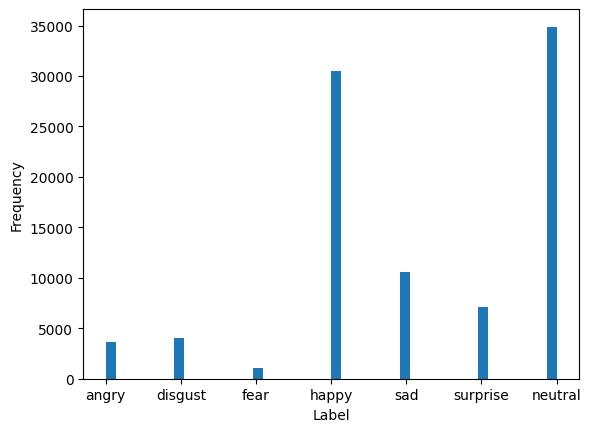

In [37]:
# Vẽ biểu đồ histogram
plt.hist(data_frame['label'], bins='auto')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.xlabel("Label")
plt.ylabel('Frequency')

plt.xticks([0, 1, 2, 3, 4, 5, 6], ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"])

# Hiển thị biểu đồ
plt.show()